In [52]:
import pandas as pd


In [53]:
df = pd.read_csv('Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [54]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [55]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [56]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [57]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [58]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [59]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [60]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [61]:
df['duration'].min()

0.83

In [62]:
df['duration'].max()

49.83

In [63]:
df['duration'].median()

11.25

## Preprocessing

In [64]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [65]:
df.stops = pd.factorize(df.stops)[0]


In [66]:
df = df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest')).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival')).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure')).drop('departure_time', axis=1)

In [67]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


## Training Regression Model

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X,y = df.drop('price', axis=1), df.price

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [72]:
reg = RandomForestRegressor(n_jobs=-1 )

reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [73]:
reg.score(X_test, y_test)

0.9852813168831633

In [75]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [77]:
y_pred = reg.predict(X_test)

print('R2', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))


R2 0.9852813168831633
MAE: 1071.1680873326557
MSE: 7613874.859137286
RMSE: 2759.3250731179332


Text(0.5, 1.0, 'Prediction VS Actual Pricce')

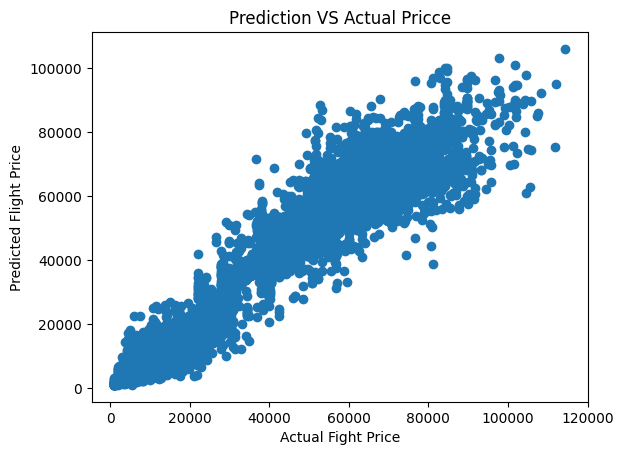

In [78]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Fight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction VS Actual Pricce')

In [79]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [80]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x:x[1], reverse=True)

sorted_importances

[('class', 0.8797255600584633),
 ('duration', 0.057574128274904976),
 ('days_left', 0.018604454792543697),
 ('airline_Air_India', 0.0051648780564496465),
 ('airline_Vistara', 0.004857766550908022),
 ('source_Delhi', 0.003725980773515579),
 ('dest_Delhi', 0.003361215765003948),
 ('source_Mumbai', 0.002278168177524243),
 ('dest_Mumbai', 0.0018814944420907176),
 ('dest_Kolkata', 0.0018812904975829467),
 ('stops', 0.001835561560763291),
 ('source_Kolkata', 0.001748390929559),
 ('dest_Hyderabad', 0.0016425466239047325),
 ('arrival_Evening', 0.0015215827606447243),
 ('source_Hyderabad', 0.0013048376506604286),
 ('dest_Bangalore', 0.0012076950252163559),
 ('arrival_Night', 0.0011528554181147671),
 ('departure_Evening', 0.0010988543551689778),
 ('source_Bangalore', 0.001062570943224079),
 ('arrival_Afternoon', 0.0010250054606440637),
 ('source_Chennai', 0.0009508569993920969),
 ('dest_Chennai', 0.0008678014629865266),
 ('departure_Morning', 0.0008584515815566977),
 ('departure_Night', 0.000802

In [81]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 10 artists>

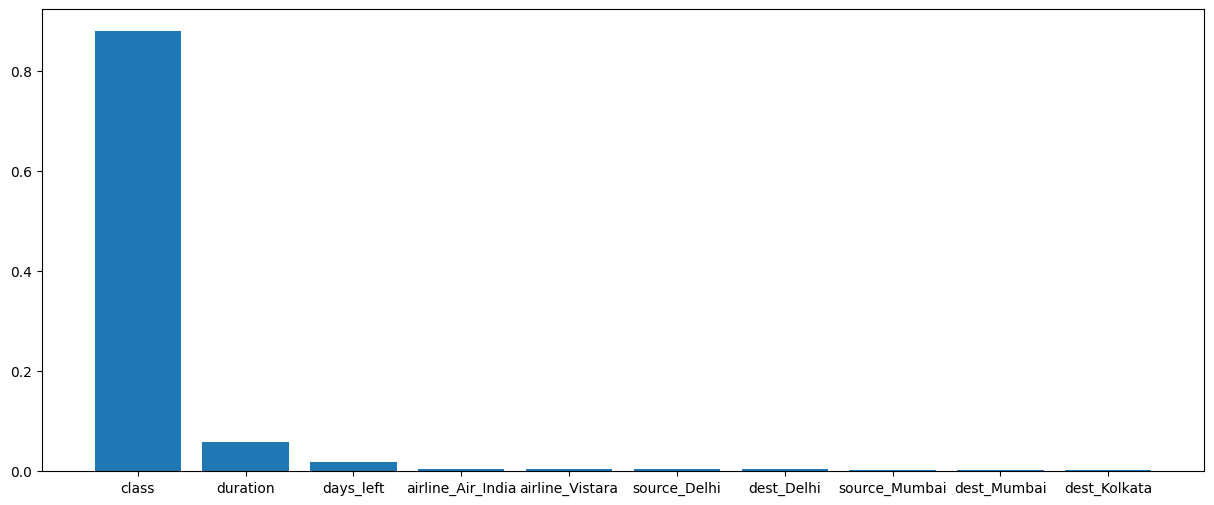

In [82]:
plt.figure(figsize=(15,6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator, param_grid, cv=5)
grid_search.fit(X_train, y_trian)

best_params = grid_search.best_params_

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100,300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'auto', 'sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3,
                                   scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   0.3s
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time= 2.9min
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time= 2.9min
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time= 2.9min


/Users/majiani/24summer/CS550_MachineLearning/Doc/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/majiani/24summer/CS550_MachineLearning/Doc/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/majiani/24summer/CS550_MachineLearning/Doc/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/majiani/24summer/CS550_MachineLearning/Doc/.venv

In [86]:
best_regressor.score

<bound method RegressorMixin.score of RandomForestRegressor(max_depth=30, min_samples_leaf=2, n_estimators=257,
                      n_jobs=-1)>

In [87]:
y_pred = best_regressor.predict(X_test)

print('R2', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2 0.9861730821801168
MAE: 1087.4852531432316
MSE: 7152570.724736936
RMSE: 2674.429046495146


Text(0.5, 1.0, 'Prediction VS Actual Pricce')

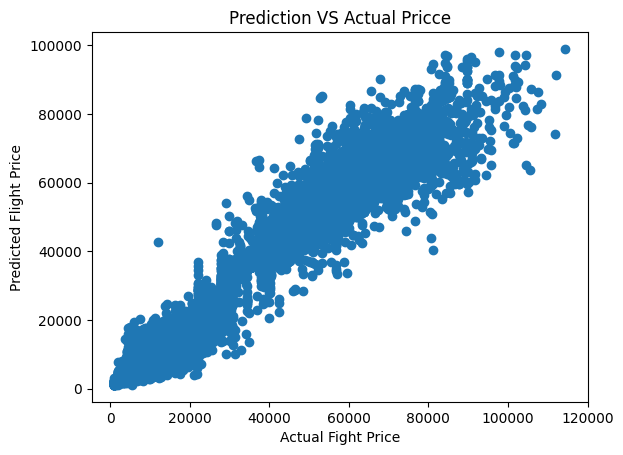

In [88]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Fight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction VS Actual Pricce')